# Lesson 4 Basic Python for Data Analytics (HR Retention Prediction)
# Introduction

Employee attrition is very important. New employees can spend time and money which could be reallocated by the company. Therefore, understanding why employees leave is very important for businesses to maximize efficiency and reduce training cost which translates into greater profit.

**Through this analysis, we would like to come up with the best possible classifications which could be used to predict if a certain employee is going to leave.**


### Possible Reason Employee quits:
* Worklife balance
* Bad managers/ colleague
* Social pressure (Scandal)
* Another better offer (salary, living condition)
* Family (maternity/ paternity leave)

## Objective

* To use pandas to load the Kaggle Employee Retention Analytics
* To explore and understand the dataset 
    * Viewing the data
    * Profile Leaving Employees
    * Correlation Analysis
* Department analysis
    * Leaving employees by Department
    * Analysis of Sales Department leaving
* To predict the retention of employees - Prediction analysis
    * Support Vector Machine (SVM)
    * Decision Tree Analysis
* Comparing models and discuss improvements
* Challenges:
    * Finding the optimum effective wage to prevent high rollers to not leave the companies
    * Comparison with other companies job perks for an analysis of labor market offering
    * Profiling employees for leadership succession / promotion
* Next lesson:
    * Lesson 5 Basic Python for Data Analytics (Social Media Trend (Twitter- Media- Big Data) )

# Getting the data

## Introduction of the dataset 
### (https://www.kaggle.com/ludobenistant/hr-analytics/discussion/26565)

#### From Kaggle description 

* Employee satisfaction level
* Last evaluation
* Number of projects
* Average monthly hours
* Time spent at the company
* Whether they have had a work accident
* Whether they have had a promotion in the last 5 years
* Department
* Salary
* Whether the employee has left

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('dataset/HR_comma_sep.csv')

##    Viewing the data

In [2]:
# Do the head analysis
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Do the tail analysis
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


##### The tail and head of the data looks clean slate. There are no missing and dirty data such as "#!? special character or -1 or 999999 

In [4]:
# Finding the datatypes
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
# Describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
# Describing the dataset (non numerical values)
df.describe(include=['object'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [7]:
# In a more simplified way
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


##### The data provided by Kaggle is clean data and good for the sake of this tutorial so that we could focus on exploring it. However, in reality, it should be dirtier and might have funny and null values.

# Data Exploration

## Profile leaving employees

0    11428
1     3571
Name: left, dtype: int64


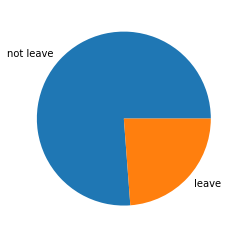

In [8]:
# Import seaborn and matplotlib with matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Getting the count of people that leave and not
leftcounts=df['left'].value_counts()
print(leftcounts)

# Using matplotlib pie chart and label the pie chart
plt.pie(leftcounts,labels=['not leave','leave']);

In [9]:
# Getting data of employees that leave and do not leave
leftdf = df[df['left']==1]
notleftdf =df[df['left']==0]

# Getting the shapes and numbers of these people
print("shape of leftdf ",leftdf.shape)
print("shape of notleftdf ",notleftdf.shape)

shape of leftdf  (3571, 10)
shape of notleftdf  (11428, 10)


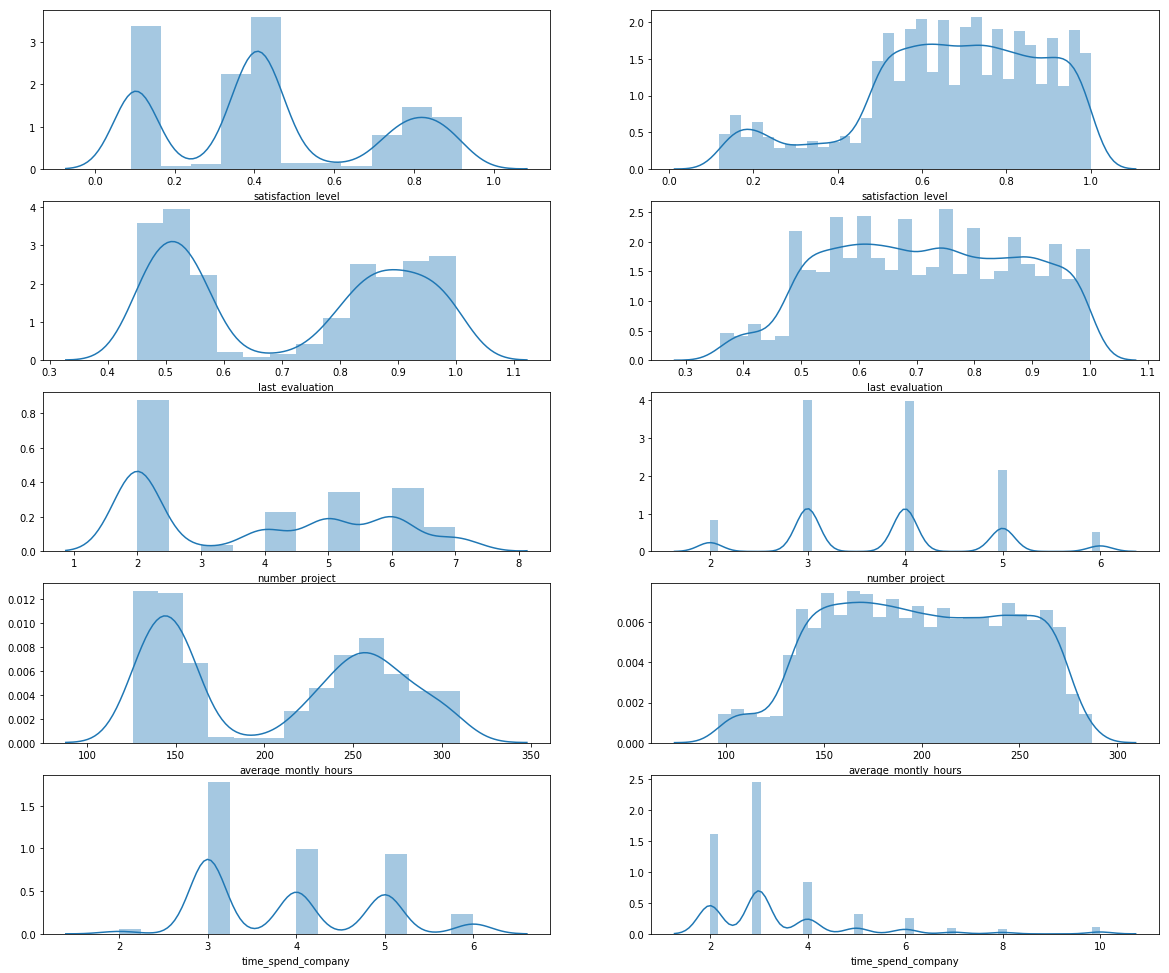

In [38]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,17))
ax1 = fig.add_subplot(521)
ax2 = fig.add_subplot(522)
ax3 = fig.add_subplot(523)
ax4 = fig.add_subplot(524)
ax5 = fig.add_subplot(525)
ax6 = fig.add_subplot(526)
ax7 = fig.add_subplot(527)
ax8 = fig.add_subplot(528)
ax9 = fig.add_subplot(529)
ax10 = fig.add_subplot(5,2,10)

# Tell pointplot to plot on ax1 with the ax argument (satisfaction level)
sns.distplot(leftdf['satisfaction_level'],ax = ax1);
sns.distplot(notleftdf['satisfaction_level'],ax = ax2);
sns.distplot(leftdf['last_evaluation'], kde=True,ax=ax3);
sns.distplot(notleftdf['last_evaluation'], kde=True,ax=ax4);
sns.distplot(leftdf['number_project'], kde=True,ax=ax5);
sns.distplot(notleftdf['number_project'], kde=True,ax=ax6);
sns.distplot(leftdf['average_montly_hours'], kde=True,ax=ax7);
sns.distplot(notleftdf['average_montly_hours'], kde=True,ax=ax8);
sns.distplot(leftdf['time_spend_company'], kde=True,ax=ax9);
sns.distplot(notleftdf['time_spend_company'], kde=True,ax=ax10);

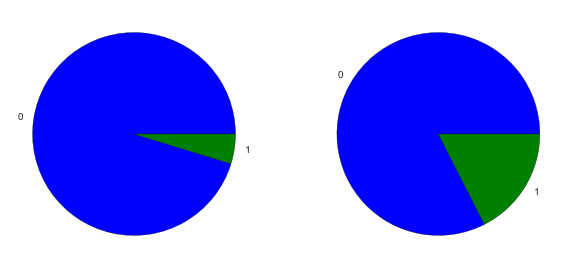

In [166]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# Do the value counts of work accident
leftworkaccidentcounts = leftdf['Work_accident'].value_counts()
notleftworkaccidentcounts = notleftdf['Work_accident'].value_counts()


# plot each pie chart in a separate subplot
ax1.pie(leftworkaccidentcounts,labels=leftworkaccidentcounts.index);
ax2.pie(notleftworkaccidentcounts,labels=notleftworkaccidentcounts.index);

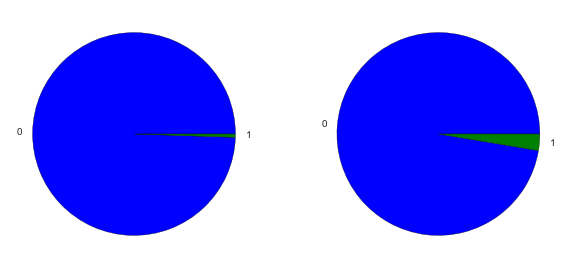

In [167]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

leftpromotioncounts = leftdf['promotion_last_5years'].value_counts()
notleftpromotioncounts = notleftdf['promotion_last_5years'].value_counts()


# plot each pie chart in a separate subplot
ax1.pie(leftpromotioncounts,labels=leftpromotioncounts.index);
ax2.pie(notleftpromotioncounts,labels=notleftpromotioncounts.index);

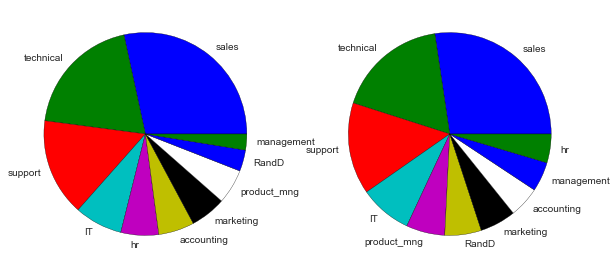

In [168]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

leftdepartmentcounts = leftdf['sales'].value_counts()
notleftdepartmentcounts = notleftdf['sales'].value_counts()


# plot each pie chart in a separate subplot
ax1.pie(leftdepartmentcounts,labels=leftdepartmentcounts.index);
ax2.pie(notleftdepartmentcounts,labels=notleftdepartmentcounts.index);

## Profile of the people who left

* satisfaction_level       Not much pattern there
* last_evaluation          High and low
* number_project           Most have 2 but there are also overworked people (maybe depends on their job requirements)
* average_montly_hours     It has either large or not so much average worked hours
* time_spend_company       Spreaded out 2 to 5
* Work_accident            Does not have much work accidents
* promotion_last_5years    Lot less not promoted
* sales                    Does not differ much
* salary                   Most of them are at the lower level salary (low)

### Conclusion: 
##### A grouping of high paying and low paying jobs would need to be distinguished to give another view of the data (last evaluation --> High and Low, Number_project)
##### The features that matter in this exploratory -- why people leave: Last_evaluation, number_projects, and salary

## Correlation Analysis

In [169]:
corr = leftdf.drop('left',axis=1).corr()

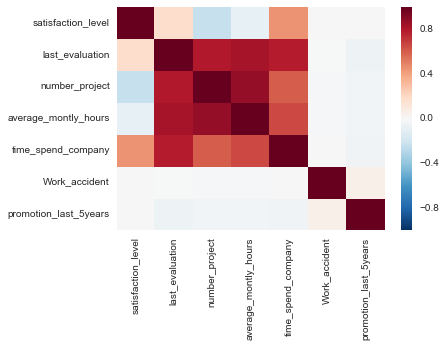

In [170]:
# plt.imshow(corr, cmap='hot', interpolation='none')
# plt.colorbar()
# plt.xticks(range(len(corr)), corr.columns)
# plt.yticks(range(len(corr)), corr.columns);
sns.heatmap(corr)

#### Correlation Analysis
###### Average monthly hours is heavily correlated with number of projects, in fact the more number of projects, the more likely that the average monthly hours are larger.
###### Average monthly hours is heavily correlated with last evaluations, in fact the more monthly hours it is, the more likely that the average monthly hours are larger.

## Department Analysis

### Which department the people that leave the most?

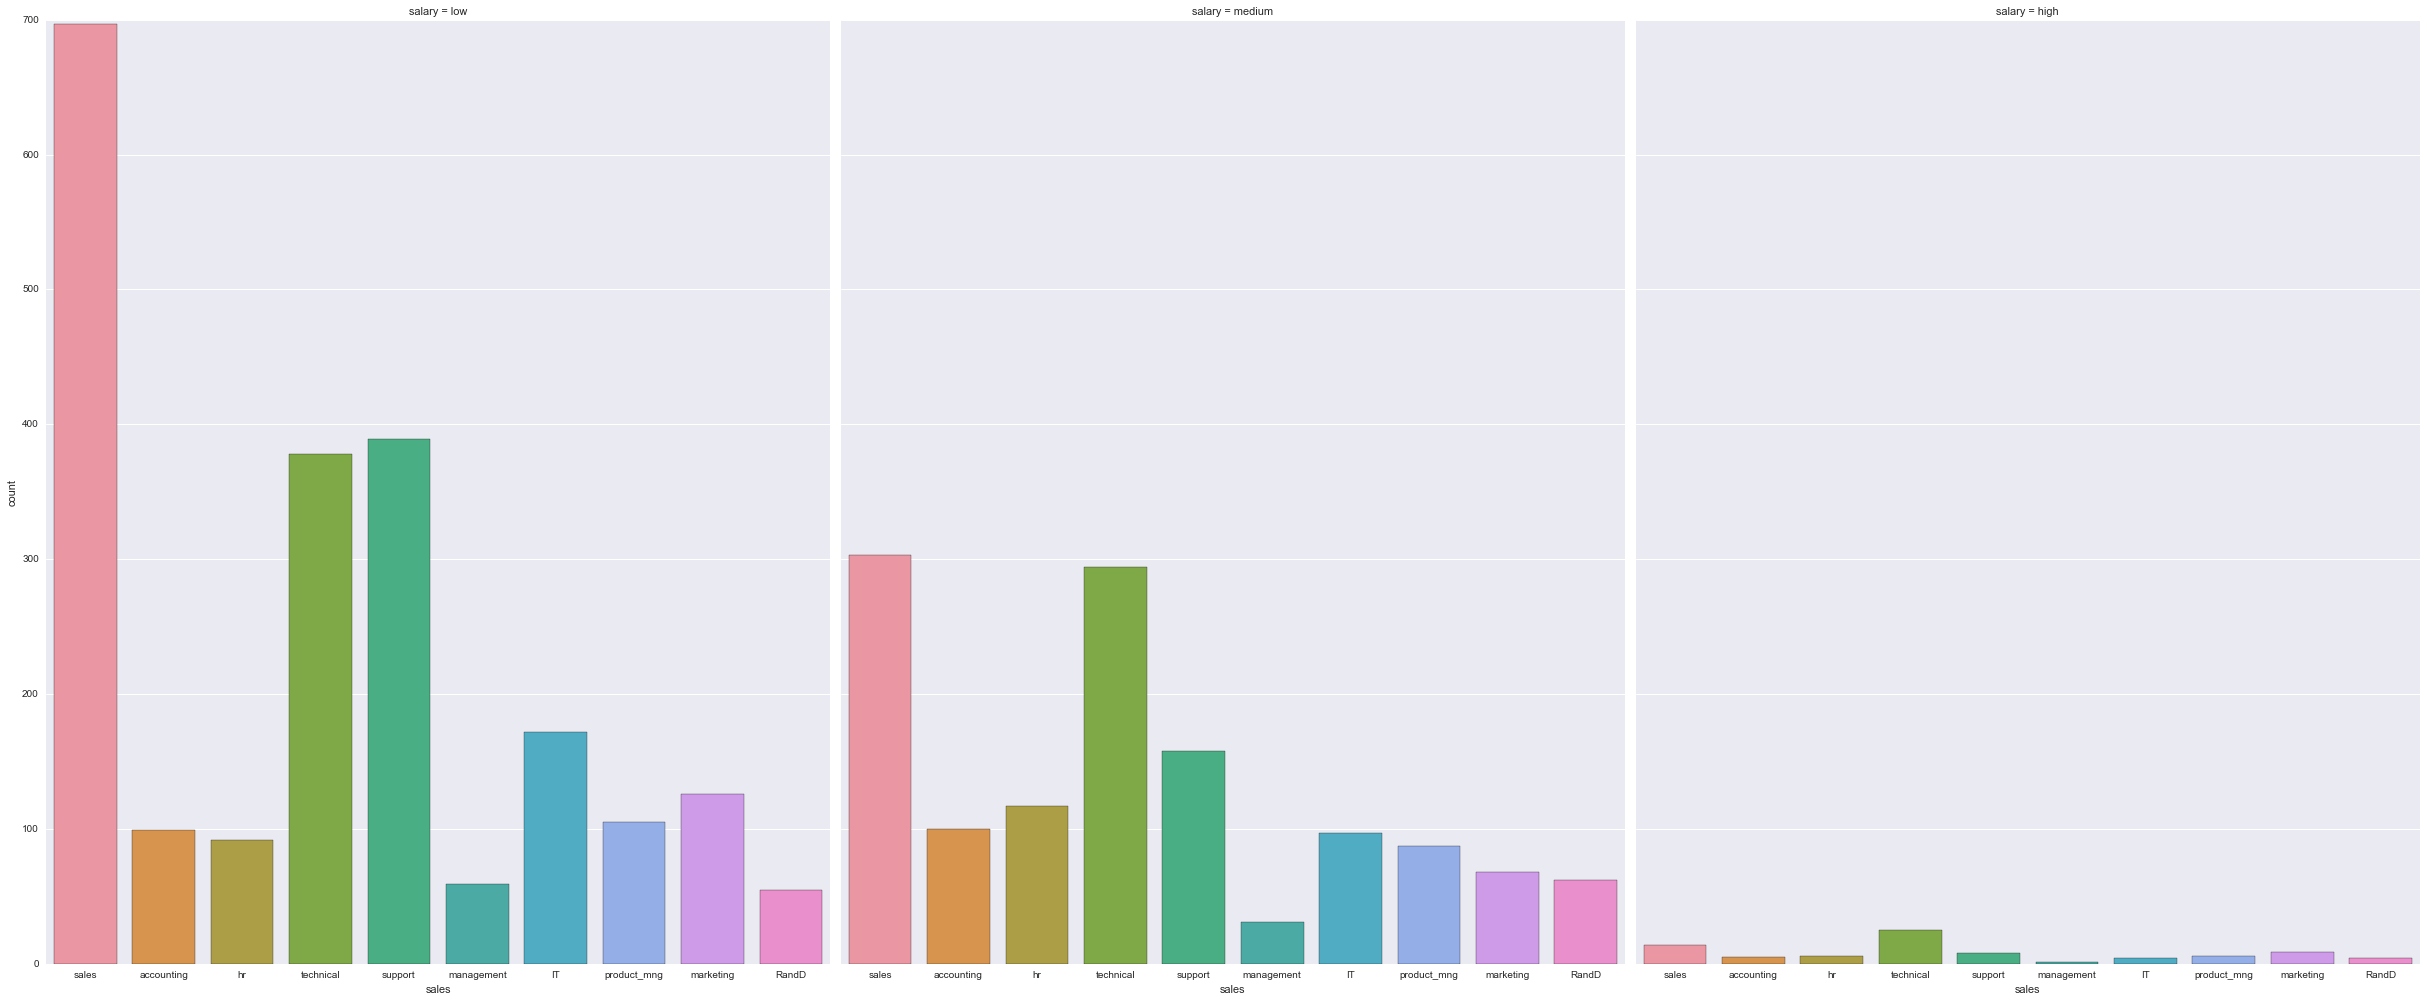

In [171]:
# For this we assume that high earners are paid highly = 3, the otherwise is paid low to decent
sns.factorplot(x="sales",data=leftdf,col="salary",kind='count',aspect=.8,size=14)

### Why sales leave the company a lot?

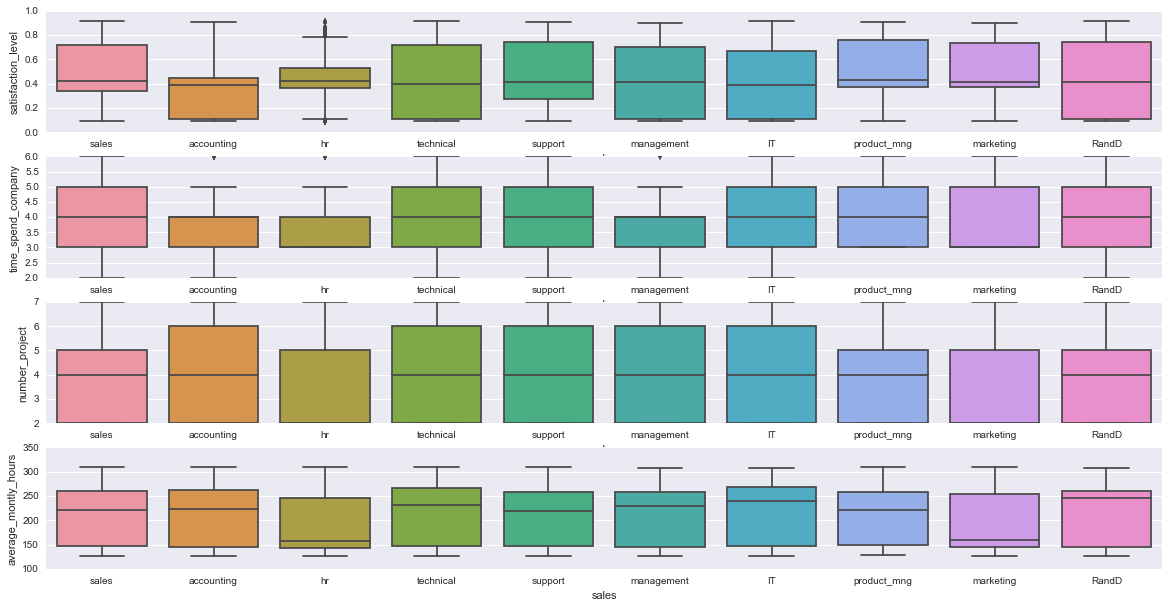

In [172]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.boxplot(x="sales",y="satisfaction_level",data=leftdf,ax=ax1)


sns.boxplot(x="sales",y="time_spend_company",data=leftdf,ax=ax2)


sns.boxplot(x="sales",y="number_project",data=leftdf,ax=ax3)


sns.boxplot(x="sales",y="average_montly_hours",data=leftdf,ax=ax4)


#### Analysis
###### There is no apparent difference or reasons that is presented in the data why sales leave the company a lot except for salary
###### Marketing and product management have high satisfaction levels despite quitting and slightly high rate of leaving in low salary.
###### Accounting has a low satisfaction level with most of the quartiles are located below 0.5, however, accounting is one of the department where the rate of leaving is low

# Model Generation

## Preparing the data for Model Generation

In [173]:
#Map salary to 0,1,2
df.salary = df.salary.map({'low':0,'medium':1,'high':2})
df.salary

0        0
1        1
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
14969    1
14970    1
14971    1
14972    1
14973    1
14974    1
14975    1
14976    1
14977    1
14978    1
14979    1
14980    2
14981    0
14982    1
14983    1
14984    1
14985    1
14986    0
14987    0
14988    0
14989    0
14990    0
14991    0
14992    0
14993    0
14994    0
14995    0
14996    0
14997    0
14998    0
Name: salary, dtype: int64

In [174]:
#dropping left and sales X for the df, y for the left
X = df.drop(['left','sales'],axis=1)
y = df['left']

## Training the model

In [175]:
import numpy as np
from sklearn import preprocessing,cross_validation,neighbors,svm

In [176]:
#splitting the train and test sets
X_train, X_test, y_train,y_test= cross_validation.train_test_split(X,y,test_size=0.2)

### Train SVM Model 

In [177]:
# initiate svm object
clfsvm = svm.SVC()
# Fit the svm object with train data
clfsvm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [178]:
# Find the accuracy through the scoring process
accuracy = clfsvm.score(X_test,y_test)
accuracy

0.95599999999999996

In [179]:
pd.DataFrame(clfsvm.predict(X_test),y_test,columns=['ytest']).head()

,ytest
left,
0,0
1,1
0,0
0,0
0,0


### Train Decision Tree Model 

In [186]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

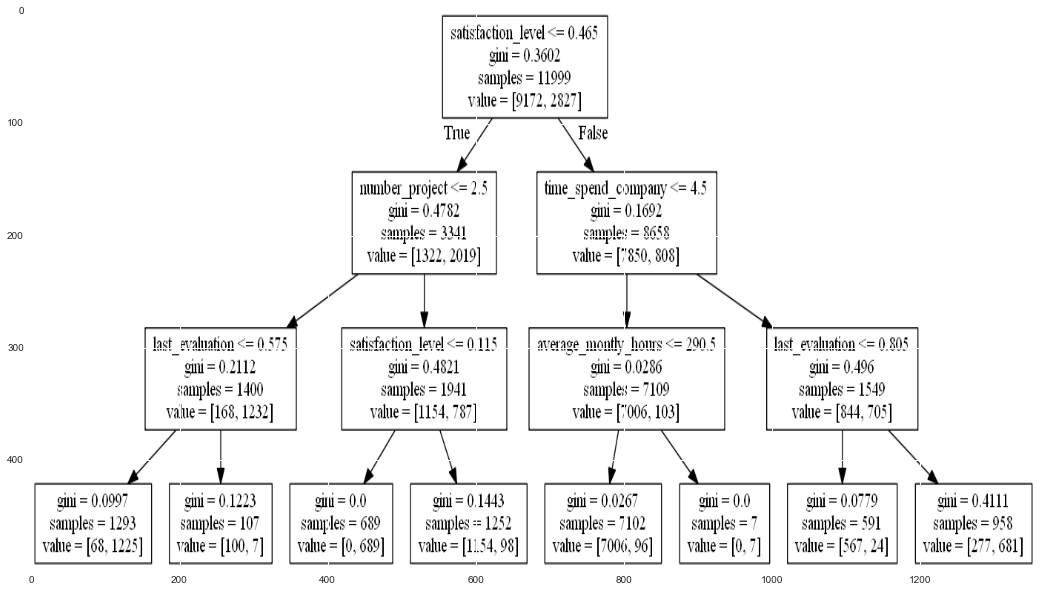

In [187]:
# Visualizing the decision tree
from sklearn import tree
from scipy import misc
import pydotplus
import graphviz

def show_tree(decisionTree, file_path):
    tree.export_graphviz(decisionTree, out_file='tree.dot',feature_names=X_train.columns)
    graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
    graph.write_png('tree.png')
    i = misc.imread(file_path)
    
    fig, ax = plt.subplots(figsize=(18, 10))    
    ax.imshow(i, aspect='auto')

# To use it
show_tree(clftree, 'tree.png')


#### Analysis
###### Both SVM and Decision Tree Model are very useful to classify observations with important predictiors
###### From the decision tree here we can also determine that those people that people that leave have low satisfaction level (<=0.115) and high number of projects (>2.5) despite of them sometimes. Salaries are not much of an important predictor in this level  --> Not within the top three branches


# Training Multiple Classifiers and Test Them

Log loss https://www.r-bloggers.com/making-sense-of-logarithmic-loss/

In [190]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 94.6667%
Log Loss: 0.804213729986
SVC
****Results****
Accuracy: 86.6667%
Log Loss: 0.291813994886
DecisionTreeClassifier
****Results****
Accuracy: 98.1333%
Log Loss: 0.644723826038
RandomForestClassifier
****Results****
Accuracy: 99.0667%
Log Loss: 0.168223031265
AdaBoostClassifier
****Results****
Accuracy: 95.8667%
Log Loss: 0.58112985305
GradientBoostingClassifier
****Results****
Accuracy: 97.8333%
Log Loss: 0.0893628612531
GaussianNB
****Results****
Accuracy: 79.2667%
Log Loss: 0.540003382996
LinearDiscriminantAnalysis
****Results****
Accuracy: 77.9333%
Log Loss: 0.451986620512
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 90.1000%
Log Loss: 0.339844761132


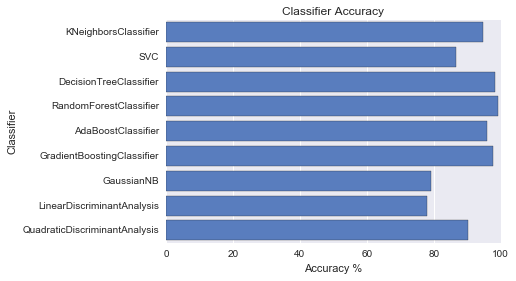

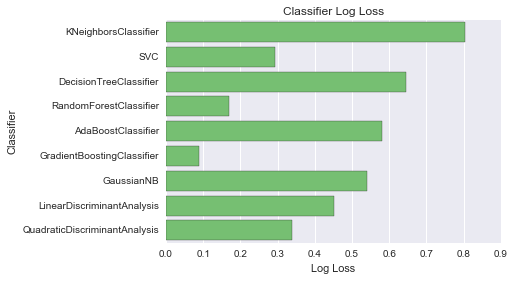

In [191]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [196]:
# Predict Test Set
favorite_clf = RandomForestClassifier()
favorite_clf.fit(X_train, y_train)
submission = pd.DataFrame(favorite_clf.predict(X_test),index=X_test.index,columns=['Prediction'])
# submission.sort('Prediction',ascending=False)

In [206]:
# See the prediction result
result = pd.concat([X_test, y_test,submission], axis=1)
# result
print(result.shape)
result[result.Prediction==1]

(3000, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,Prediction
12160,0.10,0.95,7,301,4,0,0,0,1,1
770,0.10,0.83,6,300,4,0,0,1,1,1
12764,0.83,0.99,4,223,5,0,0,1,1,1
12445,0.09,0.94,6,283,5,0,0,0,1,1
655,0.77,1.00,4,232,5,0,0,1,1,1
226,0.37,0.46,2,158,3,0,0,0,1,1
1769,0.40,0.47,2,144,3,1,0,0,1,1
14856,0.40,0.54,2,141,3,0,0,1,1,1
229,0.78,0.98,5,239,6,0,0,0,1,1
1883,0.37,0.54,2,157,3,0,0,0,1,1


**So from here we can tell get the prediction of Decision Tree or RandomForest and use it to predict future data**